In [1]:
from typing import Tuple

from trials.ModelSpec import SpecWrapper
from trials.Constants import nasbench, ALL_HASH
from trials.Utilities import get_spec
from trials.Utilities import random_spec
from typing import List
from typing import Union
import os
import json
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output
from scipy import signal




Loading dataset from file... This may take a few minutes...
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Loaded dataset in 32 seconds


In [2]:
def clear_print(text: str, wait: bool = True) -> None:
    clear_output(wait=wait)
    print(text)

In [3]:
PAD_LENGTH = 15
FIG_SIZE = (16, 8)

In [95]:
def smoothed_line_figure(y: Union[List[float], np.ndarray]) -> Tuple[plt.Figure, plt.Axes]:
    x = np.arange(len(y))
    filter_b, filter_a = signal.butter(8, 0.04)

    y_smoothed = signal.filtfilt(filter_b, filter_a, y, padlen=PAD_LENGTH)
    fig, axis = plt.subplots(figsize=FIG_SIZE)

    lines_y_smoothed = plt.plot(x, y_smoothed, color='black', alpha=1.0)
    lines_y = plt.plot(x, y, color='black', alpha=0.25, marker='o')
    plt.axline((0, 0), slope=0, color='orange')

    return (fig, axis)

In [11]:
def load_epoch_data(trial: str, epoch: str) -> np.array:
    heredity_path = os.path.join('graphs', trial, epoch, 'Heredity')

    data: List[float] = []
    for file_name in os.listdir(heredity_path):
        file_path = os.path.join(heredity_path, file_name)

        hashes = json.load(open(file_path, 'r', encoding='utf8'))
        specs = [get_spec(hsh, stop_halfway=True) for hsh in hashes]
        scores = [ind.get_data().total_accuracy for ind in specs]

        data.append(np.median(scores))

    return np.array(data)

In [47]:
def stretch_array(arr: List[float], to: List[float]) -> List[float]:
    resized = [0.0]*len(to)
    for idx_new in range(len(to)):
        idx_old = int(np.floor((idx_new/len(to))*len(arr)))
        resized[idx_new] = arr[idx_old]
    return resized

In [69]:
databa = load_epoch_data('Baseline Random Half', 'Epoch 1')

In [ ]:
data10 = load_epoch_data('Tournament N-10% 5 Best Half', 'Epoch 1')
data20 = load_epoch_data('Tournament N-20% 10 Best Half', 'Epoch 1')
data40 = load_epoch_data('Tournament N-40% 20 Best Half', 'Epoch 1')

In [96]:
print(len(data10), len(data20), len(data40))

599 298 141


In [97]:
data20_stretched = stretch_array(data20, data10)
data40_stretched = stretch_array(data40, data10)

In [98]:
print(len(data10), len(data20_stretched), len(data40_stretched))

599 599 599


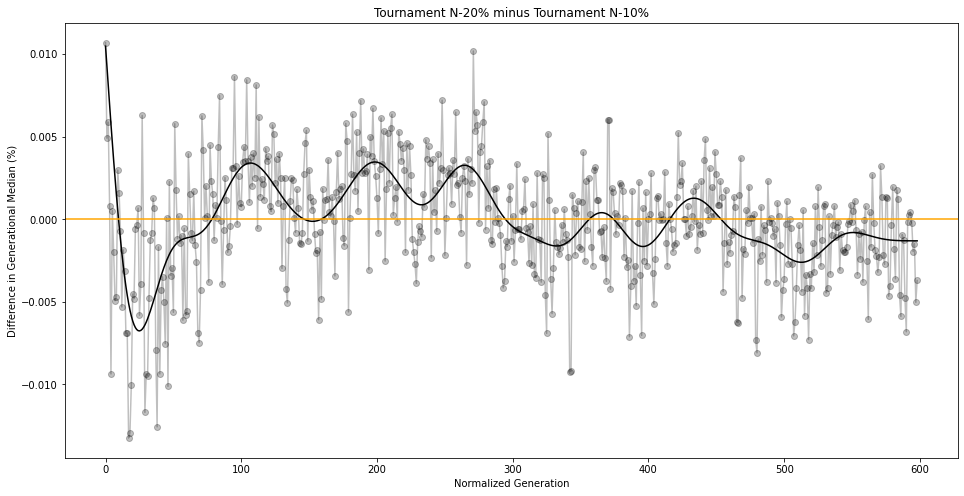

In [153]:
smoothed_line_figure(data20_stretched-data10)
plt.title('Tournament N-20% minus Tournament N-10%')
plt.ylabel('Difference in Generational Median (%)')
plt.xlabel('Normalized Generation')
plt.savefig('graphs/Tournament N-20% minus Tournament N-10%.png')

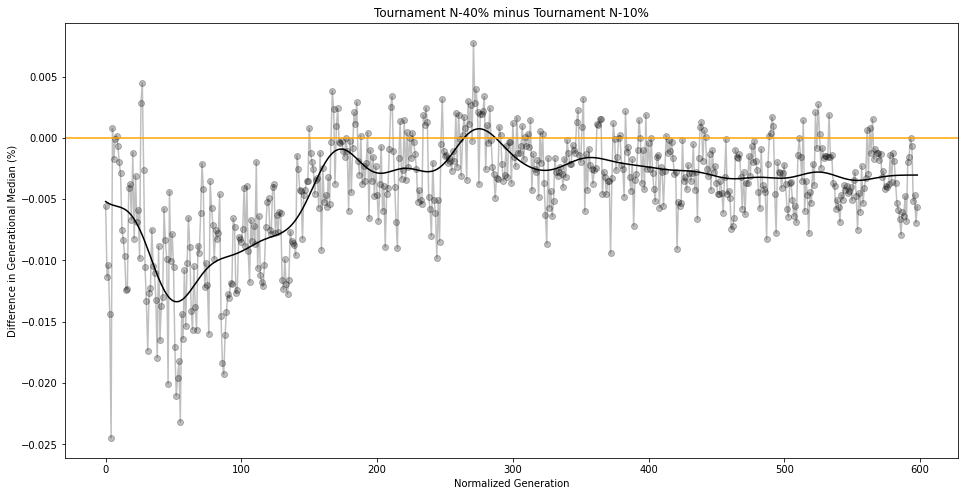

In [154]:
smoothed_line_figure(data40_stretched-data10)
plt.title('Tournament N-40% minus Tournament N-10%')
plt.ylabel('Difference in Generational Median (%)')
plt.xlabel('Normalized Generation')
plt.savefig('graphs/Tournament N-40% minus Tournament N-10%.png')

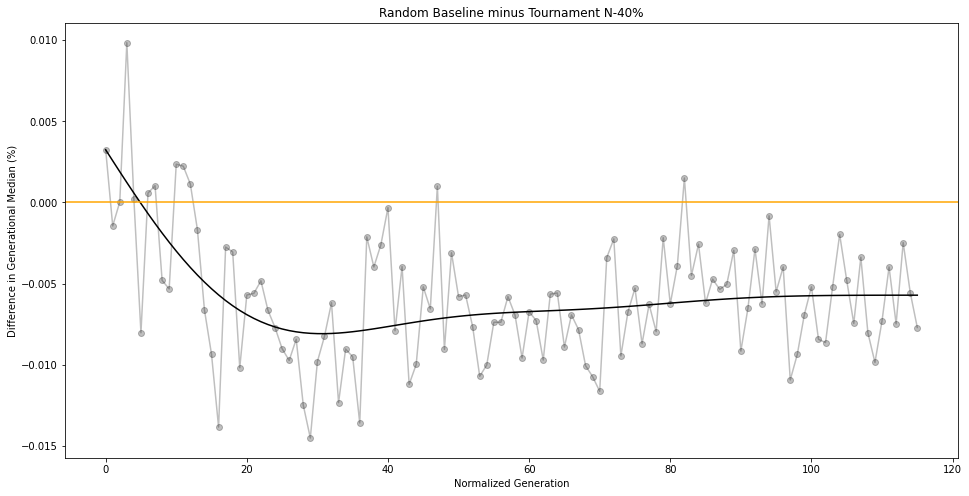

In [155]:
smoothed_line_figure(databa-stretch_array(data40, databa))
plt.title('Random Baseline minus Tournament N-40%')
plt.ylabel('Difference in Generational Median (%)')
plt.xlabel('Normalized Generation')
plt.savefig('graphs/Random Baseline minus Tournament N-40%.png')

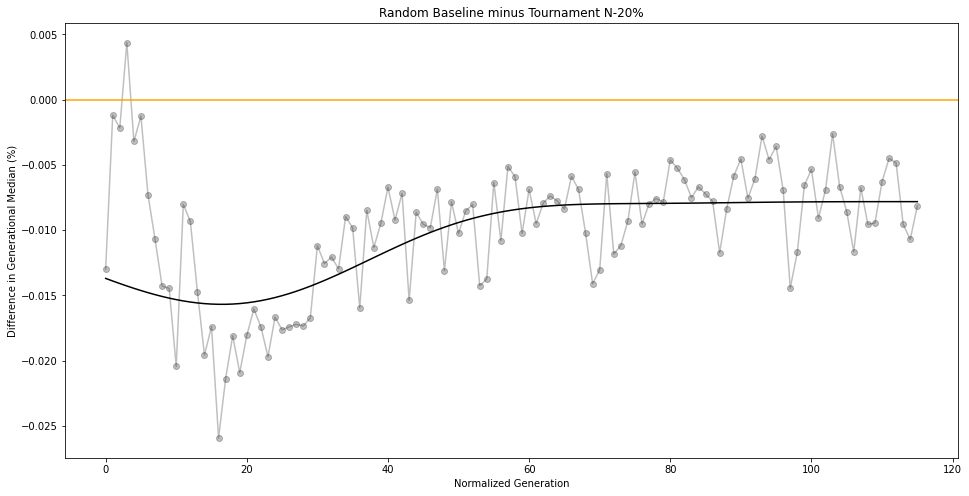

In [156]:
smoothed_line_figure(databa-stretch_array(data20, databa))
plt.title('Random Baseline minus Tournament N-20%')
plt.ylabel('Difference in Generational Median (%)')
plt.xlabel('Normalized Generation')
plt.savefig('graphs/Random Baseline minus Tournament N-20%.png')

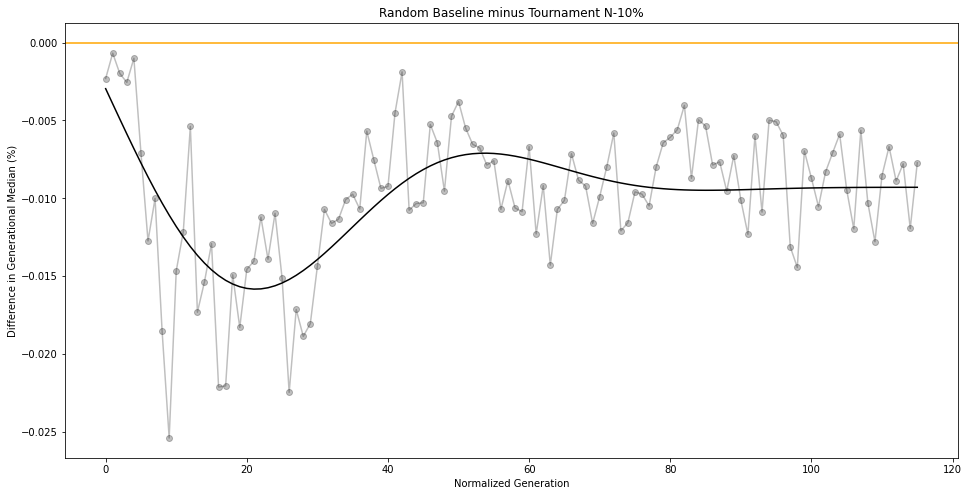

In [157]:
smoothed_line_figure(databa-stretch_array(data10, databa))
plt.title('Random Baseline minus Tournament N-10%')
plt.ylabel('Difference in Generational Median (%)')
plt.xlabel('Normalized Generation')
plt.savefig('graphs/Random Baseline minus Tournament N-10%.png')

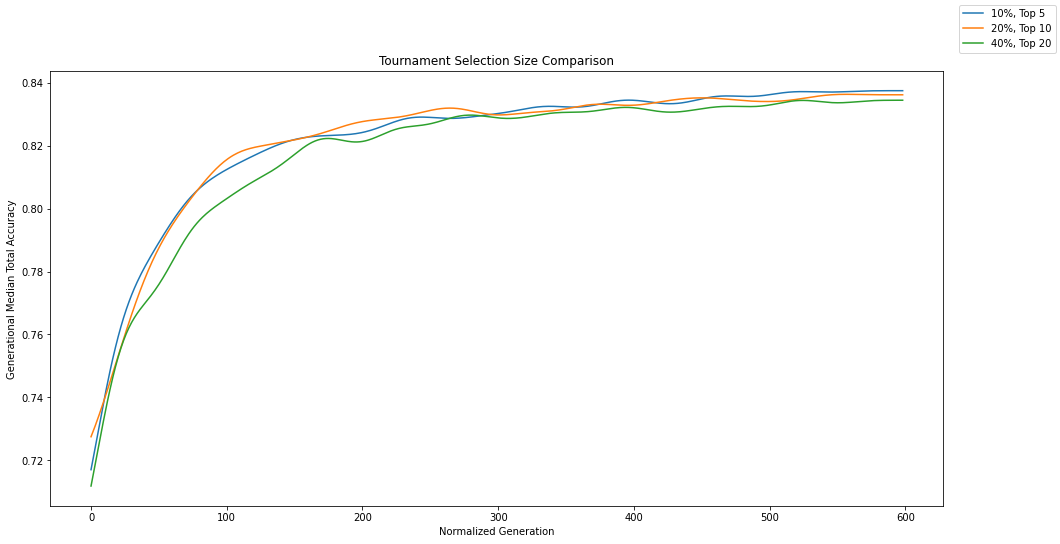

In [161]:
filter_b, filter_a = signal.butter(8, 0.04)

fig = plt.figure(figsize=FIG_SIZE)
plt.plot(signal.filtfilt(filter_b, filter_a, data10, padlen=PAD_LENGTH), label='10%, Top 5')
plt.plot(signal.filtfilt(filter_b, filter_a, stretch_array(data20, data10), padlen=PAD_LENGTH), label='20%, Top 10')
plt.plot(signal.filtfilt(filter_b, filter_a, stretch_array(data40, data10), padlen=PAD_LENGTH), label='40%, Top 20')
plt.title('Tournament Selection Size Comparison')
plt.ylabel('Generational Median Total Accuracy')
plt.xlabel('Normalized Generation')
fig.legend()
plt.savefig('graphs/Tournament Selection Size Comparison.png')

In [2]:
datas = [get_spec(hsh).get_data() for hsh in nasbench.hash_iterator()]

In [24]:
times = list(map(lambda d: d.train_time, datas))
min_time = min(times)
max_time = max(times)
sum_time = sum(times)
min_time/60, max_time/60, sum_time/60

(4.737383015950521, 92.014501953125, 13643646.1330719)

In [26]:
nasbench.get_metrics_from_hash(datas[0].hash)

({'module_adjacency': array([[0, 1, 0, 0, 1, 1, 0],
         [0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 1],
         [0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0]], dtype=int8),
  'module_operations': ['input',
   'conv3x3-bn-relu',
   'maxpool3x3',
   'conv3x3-bn-relu',
   'conv3x3-bn-relu',
   'conv1x1-bn-relu',
   'output'],
  'trainable_parameters': 8555530},
 {108: [{'halfway_training_time': 883.4580078125,
    'halfway_train_accuracy': 0.8282251358032227,
    'halfway_validation_accuracy': 0.7776442170143127,
    'halfway_test_accuracy': 0.7740384340286255,
    'final_training_time': 1769.1279296875,
    'final_train_accuracy': 1.0,
    'final_validation_accuracy': 0.9241786599159241,
    'final_test_accuracy': 0.9211738705635071},
   {'halfway_training_time': 883.6810302734375,
    'halfway_train_accuracy': 0.8796073794364929,
    'halfway_validation_accuracy': 0.8291265964508057,
    'halfway_test_a